In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
scaler = MinMaxScaler()

# Load your dataset
file_path = 'spotifycombines.csv'
songs_df = pd.read_csv(file_path)

# List of audio features to analyze
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]


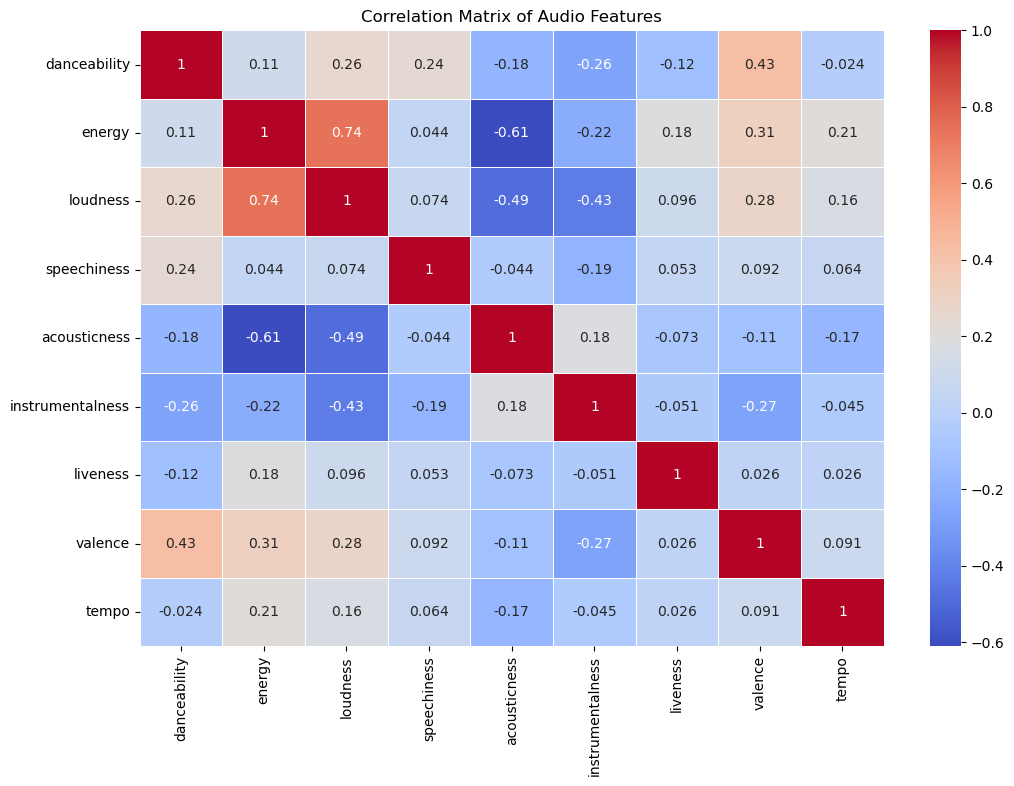

In [2]:
# Create the correlation matrix
correlation_matrix = songs_df[features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()


In [3]:
"""
Strong Positive Correlations:

Energy and Loudness (0.739): High energy songs tend to be louder.
Danceability and Valence (0.432): Happier songs tend to be more danceable.

Strong Negative Correlations:

Energy and Acousticness (-0.611): Energetic songs tend to be less acoustic.
Loudness and Acousticness (-0.491): Louder songs tend to be less acoustic.
Loudness and Instrumentalness (-0.430): Louder songs tend to be less instrumental.
"""

'\nStrong Positive Correlations:\n\nEnergy and Loudness (0.739): High energy songs tend to be louder.\nDanceability and Valence (0.432): Happier songs tend to be more danceable.\n\nStrong Negative Correlations:\n\nEnergy and Acousticness (-0.611): Energetic songs tend to be less acoustic.\nLoudness and Acousticness (-0.491): Louder songs tend to be less acoustic.\nLoudness and Instrumentalness (-0.430): Louder songs tend to be less instrumental.\n'

In [5]:
normalized_features = scaler.fit_transform(songs_df[features])

# Create a new DataFrame with normalized features
normalized_songs_df = pd.DataFrame(normalized_features, columns=features)
normalized_songs_df = pd.concat([songs_df[['song_title', 'artist_name']], normalized_songs_df], axis=1)

# Check for missing values
missing_values = normalized_songs_df.isnull().sum()
normalized_songs_df.dropna(inplace=True)
missing_values_after = normalized_songs_df.isnull().sum()

print(missing_values_after)

song_title          0
artist_name         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


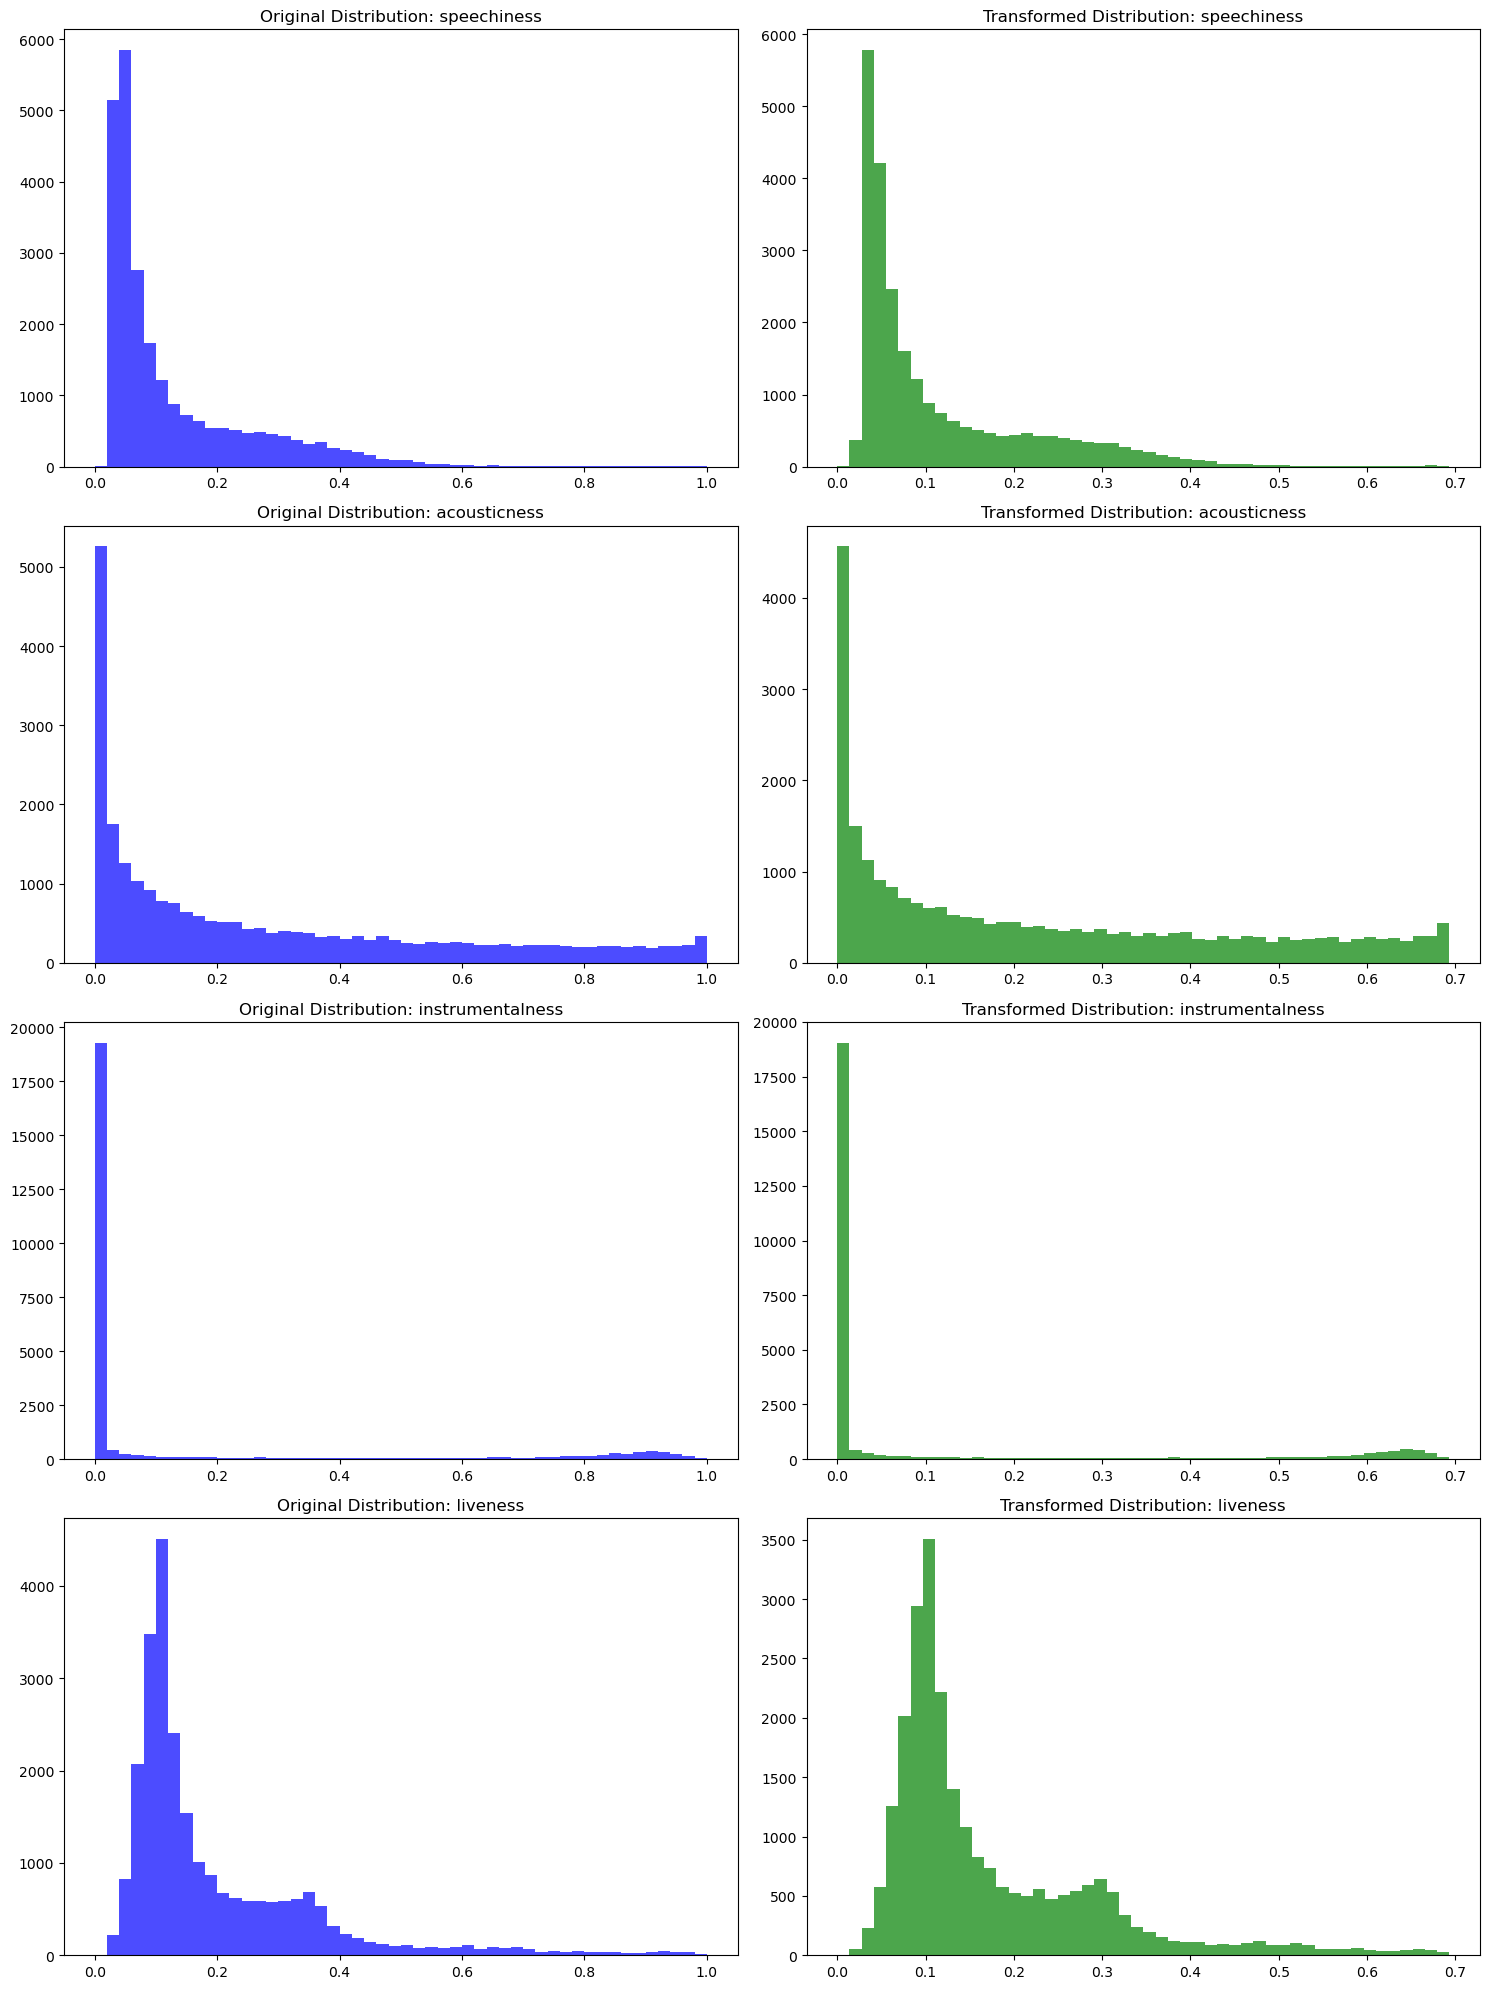

In [6]:
# Function to plot distributions before and after transformation
def plot_distributions(df, features, transformed_df):
    fig, axes = plt.subplots(len(features), 2, figsize=(15, 5 * len(features)))
    
    for i, feature in enumerate(features):
        # Original distribution
        axes[i, 0].hist(df[feature].dropna(), bins=50, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Original Distribution: {feature}')
        
        # Transformed distribution
        axes[i, 1].hist(transformed_df[feature].dropna(), bins=50, color='green', alpha=0.7)
        axes[i, 1].set_title(f'Transformed Distribution: {feature}')
    
    plt.tight_layout()
    plt.show()

# Check for skewness
skewness = normalized_songs_df[features].skew()

# Identify skewed features
skewed_features = skewness[skewness > 0.75].index


# Apply log transformation to skewed features
transformed_songs_df = normalized_songs_df.copy()
for feature in skewed_features:
    transformed_songs_df[feature] = np.log1p(transformed_songs_df[feature])

# Plot distributions before and after transformation
plot_distributions(normalized_songs_df, skewed_features, transformed_songs_df)

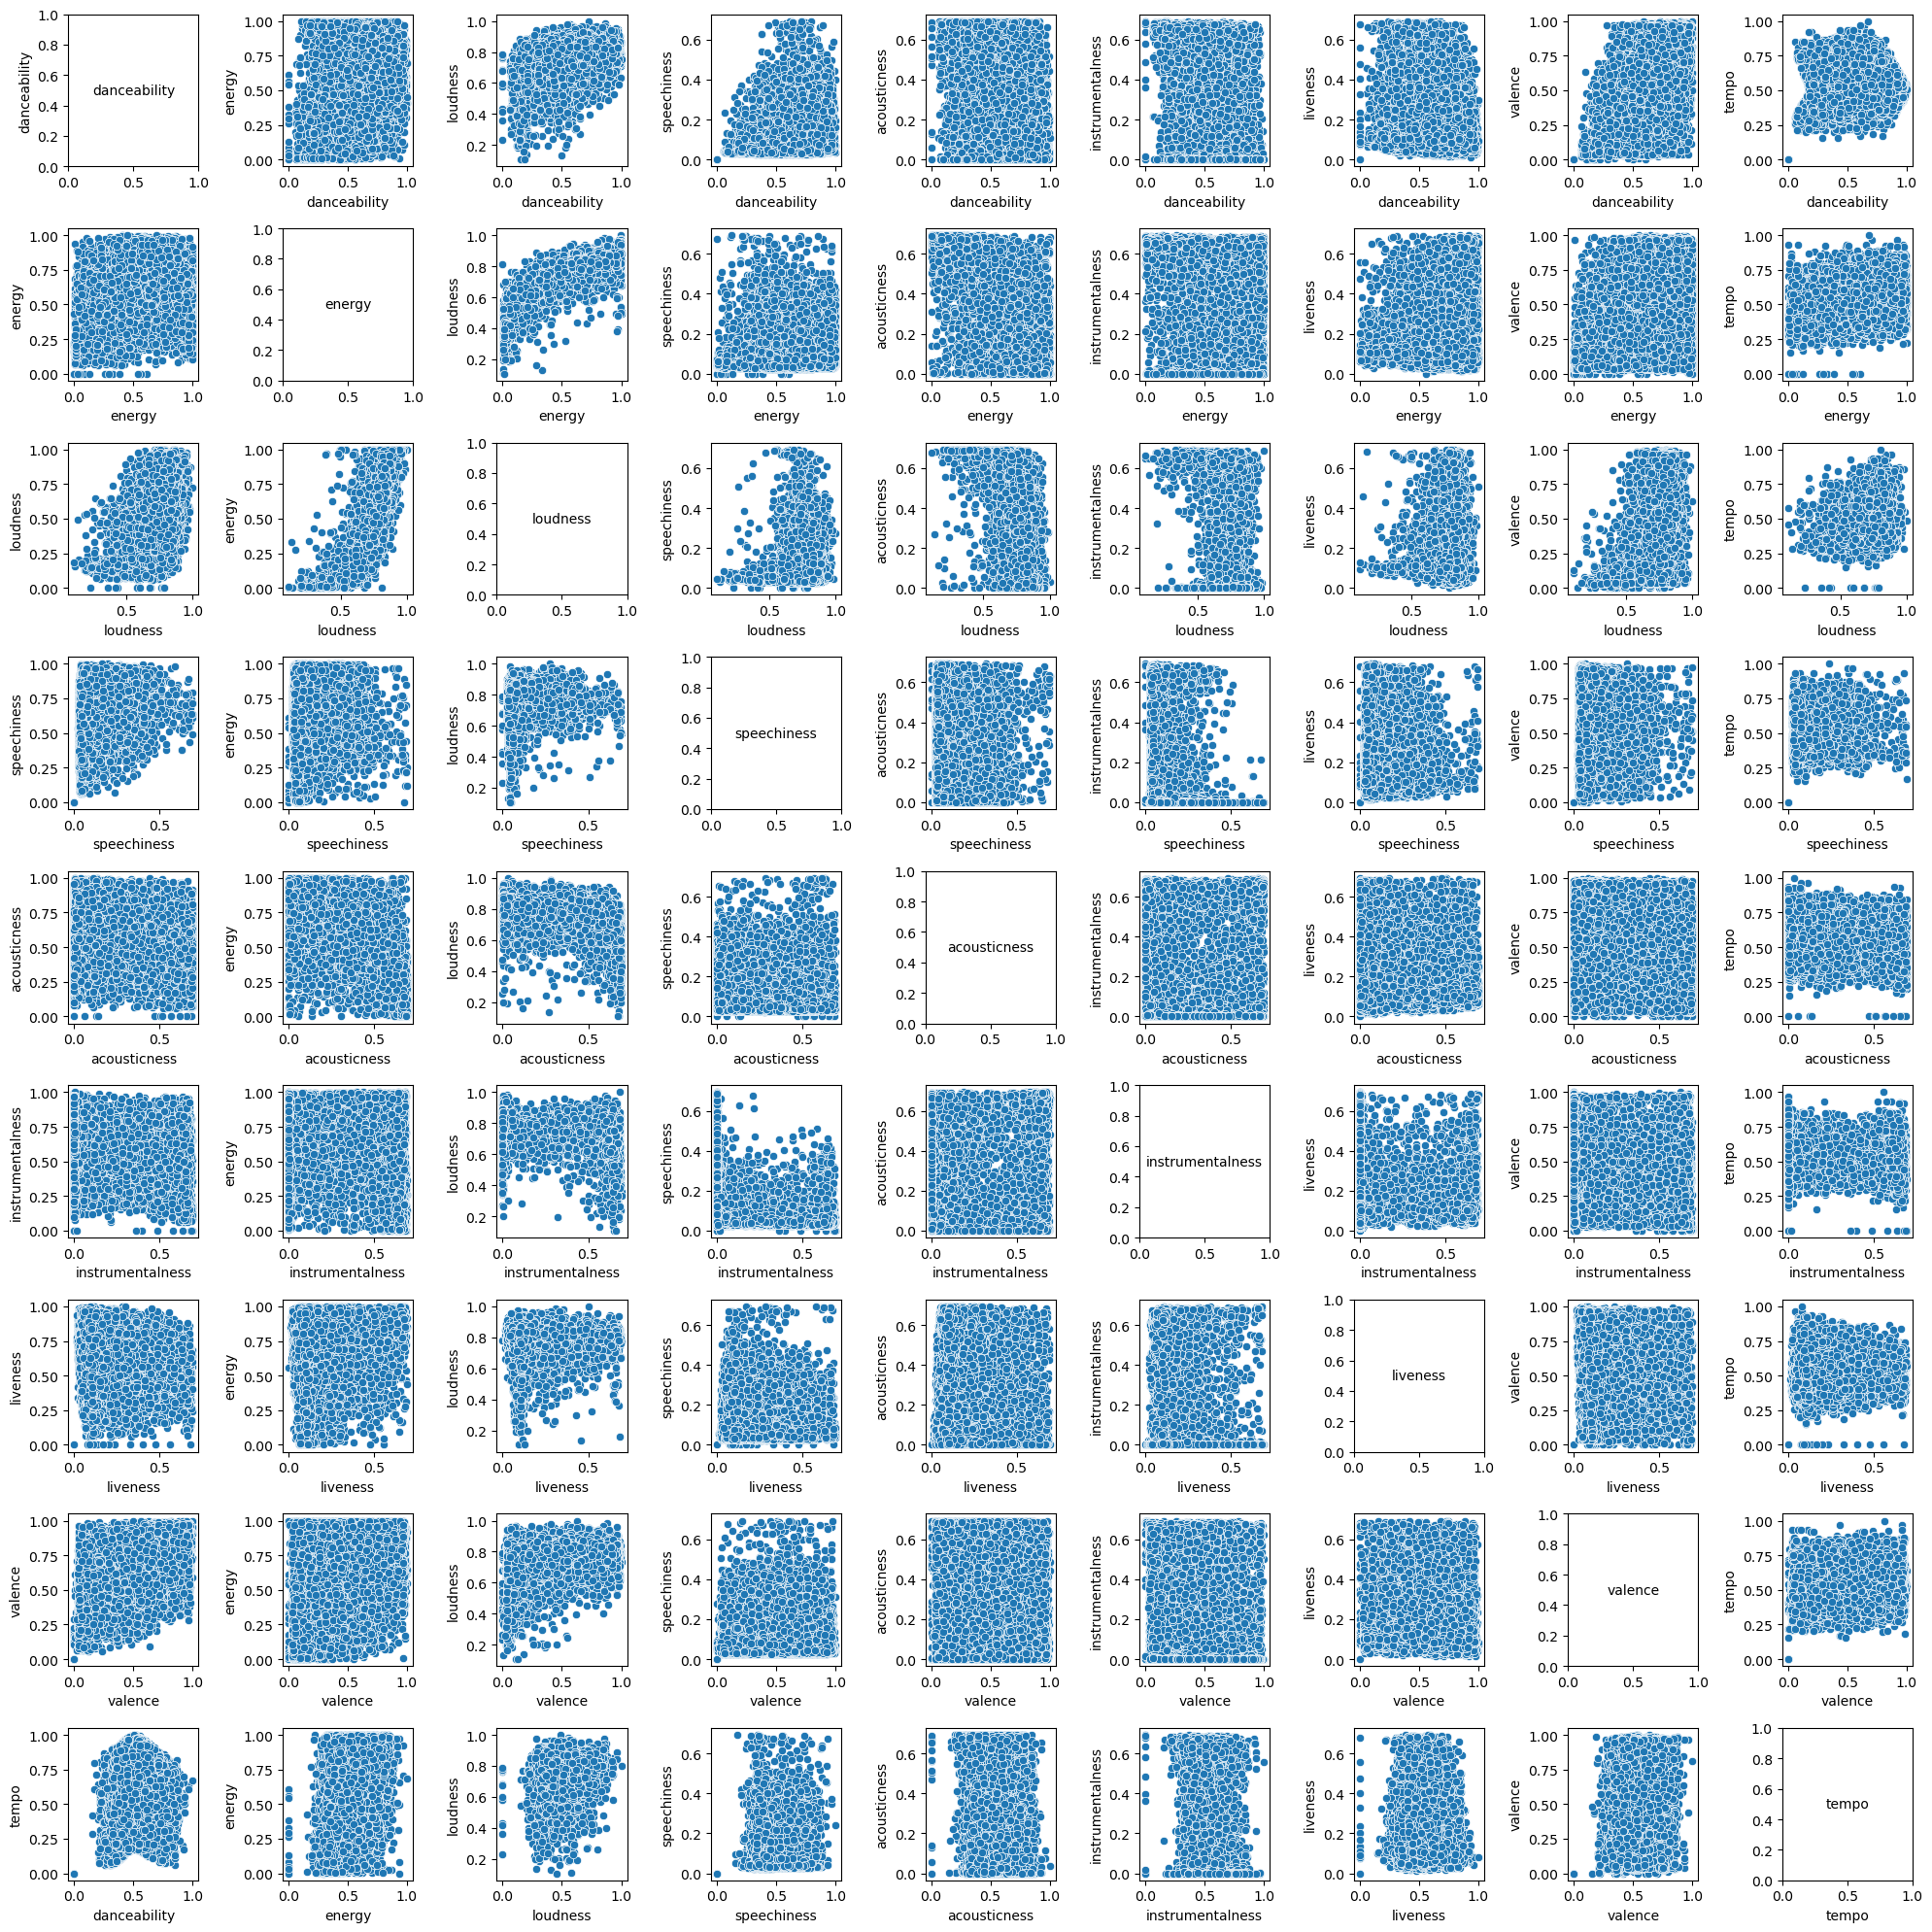

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of audio features to analyze
features = [
    'danceability', 'energy', 'loudness',  'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Pairwise scatter plots for feature analysis
def plot_pairwise_scatter(df, features):
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i != j:
                sns.scatterplot(x=df[feature1], y=df[feature2], ax=axes[i, j])
            else:
                axes[i, j].text(0.5, 0.5, feature1, ha='center', va='center')
            if j == 0:
                axes[i, j].set_ylabel(feature1)
            if i == num_features - 1:
                axes[i, j].set_xlabel(feature2)
    
    plt.tight_layout()
    plt.show()

# Plot pairwise scatter plots
plot_pairwise_scatter(transformed_songs_df, features)


In [9]:
transformed_songs_df=transformed_songs_df[features]
transformed_songs_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.759109,0.663993,0.868959,0.110348,0.260199,0.000000,0.090727,0.8920,0.238297
1,0.658907,0.946999,0.849368,0.054626,0.267141,0.000000,0.655213,0.7220,0.669295
2,0.720648,0.962999,0.797089,0.273520,0.003898,0.000824,0.179971,0.7560,0.402142
3,0.425101,0.808996,0.838334,0.041522,0.004858,0.000000,0.104958,0.5370,0.485597
4,0.616397,0.302986,0.743435,0.035106,0.668756,0.647103,0.116665,0.3430,0.507906
...,...,...,...,...,...,...,...,...,...
24979,0.841093,0.731995,0.775727,0.266363,0.349015,0.000000,0.101328,0.7480,0.618100
24980,0.625506,0.863997,0.833299,0.043319,0.113759,0.000000,0.091645,0.8280,0.685900
24981,0.387652,0.807996,0.810889,0.084073,0.153290,0.000000,0.040613,0.3700,0.414626
24982,0.764170,0.481990,0.612858,0.044515,0.376261,0.000000,0.122022,0.7610,0.355881


In [ ]:
def cosine_sim(feature1, feature2):
    return cosine_similarity(feature1.reshape(1, -1), feature2.reshape(1, -1))[0][0]

def calculate_strong_similarity(song1, song2):
    sim_energy_loudness = cosine_sim(song1[['energy', 'loudness']].values, song2[['energy', 'loudness']].values)
    sim_energy_acousticness = cosine_sim(song1[['energy']].values, -song2[['acousticness']].values)
    return sim_energy_loudness, sim_energy_acousticness
